# Logistic Regression by Tensorflow

## Cross Entropy (CE)
H(p,q) = - SIGMA(x) p(x)*log q(x) 
p: target, q: estimate

## CE in Neural Net
CE = - SIGMA(D) SIGMA(K) P(target = K) log P(estimate = K)

D : # of batch
K : # of class
P : by softmax

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('data/', one_hot=True)
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels
x_valid = mnist.validation.images
y_valid = mnist.validation.labels

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [5]:
X = tf.placeholder(tf.float32, [None,28*28])
Y = tf.placeholder(tf.float32, [None,10])
W = tf.Variable(tf.random_normal([784,10], stddev=0.1),dtype=tf.float32)
b = tf.Variable(tf.zeros([10]))

layer1 = tf.layers.dense(X, 10, activation = None, kernel_initializer = tf.initializers.truncated_normal)

actv1 = tf.nn.softmax(tf.matmul(X,W)+b)

actv2 = tf.nn.softmax(layer1)

def cost_fcn(actv):
    return tf.reduce_mean(-tf.reduce_sum(Y*tf.log(actv), reduction_indices = 1))

cost1 = cost_fcn(actv1)
cost2 = cost_fcn(actv2)

learning_rate = 0.01
optm1 = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost1)
optm2 = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost2)

In [6]:
pred1 = tf.equal(tf.argmax(actv1,1),tf.argmax(Y,1))
pred2 = tf.equal(tf.argmax(actv2,1),tf.argmax(Y,1))

accr1 = tf.reduce_mean(tf.cast(pred1,tf.float32))
accr2 = tf.reduce_mean(tf.cast(pred2,tf.float32))

In [8]:
training_epochs = 50
batch_size = 100
init = tf.global_variables_initializer()

In [10]:
batch_size

with tf.Session() as sess:
    sess.run(init)
    train_accr1=[]
    train_accr2=[]
    test_accr1=[]
    test_accr2=[]
    
    for epoch in range(training_epochs):
        avg_cost1 = 0
        avg_cost2 = 0
        num_batch = x_train.shape[0]//batch_size
        for i in range(num_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(optm1,feed_dict={X:batch_xs, Y:batch_ys})
            sess.run(optm2,feed_dict={X:batch_xs, Y:batch_ys})
            
            avg_cost1 += sess.run(cost1,feed_dict={X:batch_xs, Y:batch_ys})/num_batch
            avg_cost2 += sess.run(cost2,feed_dict={X:batch_xs, Y:batch_ys})/num_batch
            
        if epoch % 5:
            train_ac1 = sess.run(accr1, feed_dict={X:batch_xs, Y:batch_ys})
            train_ac2 = sess.run(accr2, feed_dict={X:batch_xs, Y:batch_ys})
            test_ac1 = sess.run(accr1, feed_dict={X:x_valid, Y:y_valid})
            test_ac2 = sess.run(accr2, feed_dict={X:x_valid, Y:y_valid})
            
            print(f"Epoch: #{epoch}")
            print("#1")
            print(f"train accuracy: {train_ac1}\t test accuracy: {test_ac1}")
            print("#2")
            print(f"train accuracy: {train_ac2}\t test accuracy: {test_ac2}")
            train_accr1.append(train_ac1)
            train_accr2.append(train_ac2)
            test_accr1.append(test_ac1)
            test_accr2.append(test_ac2)


Epoch: #1
#1
train accuracy: 0.9200000166893005	 test accuracy: 0.8478000164031982
#2
train accuracy: 0.550000011920929	 test accuracy: 0.4903999865055084
Epoch: #2
#1
train accuracy: 0.9100000262260437	 test accuracy: 0.8651999831199646
#2
train accuracy: 0.5899999737739563	 test accuracy: 0.5845999717712402
Epoch: #3
#1
train accuracy: 0.8899999856948853	 test accuracy: 0.8759999871253967
#2
train accuracy: 0.6000000238418579	 test accuracy: 0.645799994468689
Epoch: #4
#1
train accuracy: 0.8899999856948853	 test accuracy: 0.8849999904632568
#2
train accuracy: 0.6299999952316284	 test accuracy: 0.6832000017166138
Epoch: #6
#1
train accuracy: 0.8500000238418579	 test accuracy: 0.8925999999046326
#2
train accuracy: 0.7099999785423279	 test accuracy: 0.7333999872207642
Epoch: #7
#1
train accuracy: 0.8899999856948853	 test accuracy: 0.8944000005722046
#2
train accuracy: 0.7400000095367432	 test accuracy: 0.7468000054359436
Epoch: #8
#1
train accuracy: 0.8500000238418579	 test accuracy: 0.

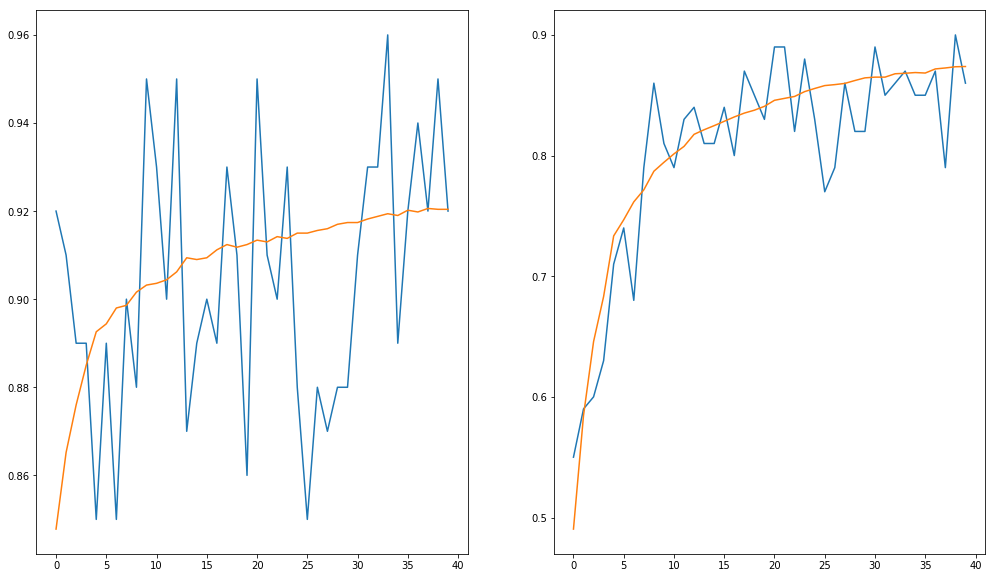

In [17]:
fig,axs = plt.subplots(1,2 ,figsize=(17,10))
axs[0].plot(train_accr1)
axs[0].plot(test_accr1)
axs[1].plot(train_accr2)
axs[1].plot(test_accr2)